# Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
melb = pd.read_csv('melb_data.csv')
print(melb.shape)
melb.head(3)

(13580, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


# Preprocessing

In [3]:
#

melb.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car               True
Landsize         False
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [4]:
car_average = melb[melb.Car != np.nan].Car.mean()
print(car_average)
melb.Car = melb.Car.replace(np.nan, car_average)
not melb.Car.isnull().any()

1.6100754549489569


True

In [5]:
# remove indecisible features
melb = melb.dropna(axis=0)
melb.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [26]:
# Get list of categorical variables(string variables)
s = (melb.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


# EDA

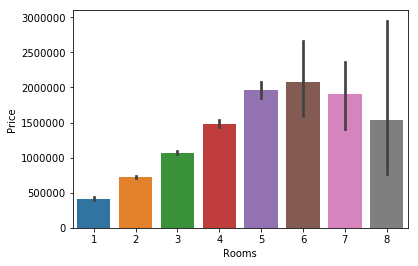

In [6]:
sns.barplot(data=melb, x='Rooms', y='Price')

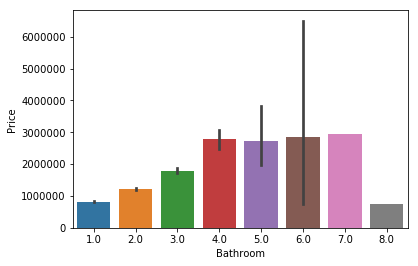

In [7]:
sns.barplot(data=melb, x='Bathroom', y='Price')

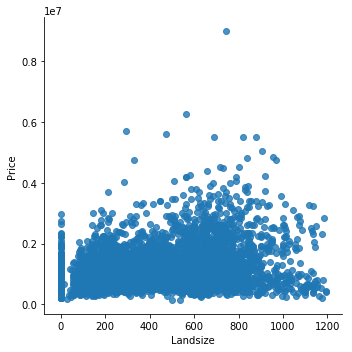

In [8]:
# 아주 미세한 우상향이기 때문에 별 의미가 없을 거라고 생각했으나 이상하게도 영향을 주는 것 같았다.
sns.lmplot(data=melb[melb.Landsize < 1200], x='Landsize', y='Price', fit_reg=False)

# Defining a model

In [9]:
features = ['Rooms', 'Bathroom', 'Lattitude', 'Landsize', 'Longtitude', 'YearBuilt']
X = melb[features]
X.describe()

,Rooms,Bathroom,Lattitude,Landsize,Longtitude,YearBuilt
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,-37.807904,471.006940,144.990201,1964.081988
std,0.971079,0.711362,0.075850,897.449881,0.099165,38.105673
min,1.000000,1.000000,-38.164920,0.000000,144.542370,1196.000000
25%,2.000000,1.000000,-37.855438,152.000000,144.926198,1940.000000
50%,3.000000,1.000000,-37.802250,373.000000,144.995800,1970.000000
75%,4.000000,2.000000,-37.758200,628.000000,145.052700,2000.000000
max,8.000000,8.000000,-37.457090,37000.000000,145.526350,2018.000000


In [10]:
print(X.shape)
X.head(3)

(6196, 6)


,Rooms,Bathroom,Lattitude,Landsize,Longtitude,YearBuilt
1,2,1.0,-37.8079,156.0,144.9934,1900.0
2,3,2.0,-37.8093,134.0,144.9944,1900.0
4,4,1.0,-37.8072,120.0,144.9941,2014.0


In [11]:
y = melb.Price
print(y.shape)
y.head(3)

(6196,)


1    1035000.0
2    1465000.0
4    1600000.0
Name: Price, dtype: float64

# Training

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [13]:
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

## Hyperparameter Tuning

### Grid Search

In [14]:
# find best depth
max_depth_list = [3,5,7, 10, 20, 30, 50]
for max_depth in max_depth_list:
    _model = RandomForestRegressor(random_state=0, max_depth=max_depth)
    _prediction = cross_val_predict(_model, X, y, cv=5)
    RMSE = mean_squared_error(y, _prediction)
    print("%d max_depth - %d" %(max_depth, RMSE))

/opt/conda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


3 max_depth - 258464446287
5 max_depth - 195607202239
7 max_depth - 160334993475
10 max_depth - 136266174801
20 max_depth - 127343593685
30 max_depth - 127652662933
50 max_depth - 127624689881


In [15]:
# find best leaf_nodes
max_leaf_nodes_list = [5, 50, 500, 5000]
for max_leaf_nodes in max_leaf_nodes_list:
    _model = RandomForestRegressor(random_state=0, max_leaf_nodes=max_leaf_nodes)
    _prediction = cross_val_predict(_model, X, y, cv=5)
    RMSE = mean_squared_error(y, _prediction)
    print("%d max_leaf_nodes %d" %(max_leaf_nodes, RMSE))

5 max_leaf_nodes 286287621038
50 max_leaf_nodes 156158559844
500 max_leaf_nodes 128404293412
5000 max_leaf_nodes 129124634206


In [16]:
# model = DecisionTreeRegressor(random_state=0)
# model = RandomForestRegressor(random_state=0)
model = RandomForestRegressor(random_state=0, max_depth=20, max_leaf_nodes=500)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=500,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

# Evaluation/Validation

In [17]:
prediction = cross_val_predict(model, X, y, cv=5)
prediction

array([1123412.66499271, 1458539.74747475, 1408210.96459096, ...,
        369972.6891719 ,  561159.49454724, 2958542.35294118])

In [18]:
RMSLE = np.sqrt(mean_squared_log_error(prediction, y))
# 1st iteration - DecisionTreeRegressor
# 0.32845... /w features 'Rooms', 'Bathroom', 'Lattitude', 'Longtitude', 'Landsize'
# 0.39 Landsize를 뺐더니 더 점수가 나빠졌다
# 2st iteration - RandomForestRegressor
# 0.25475... 훨씬 좋은 점수!
# 3rd iteration - /w Hyperparameter tuning
# 0.2574.... 별 차이 없는 점수


# 환경을 docker로 재구축 후에 테스트하자 약간 결과가 다르게 나옴
# 1st - DTR
# 0.3286718806504678
# 1st - RFR w/o Hyperparameter tuning
# 0.2653840324299426
# 2nd - RFR w/ Hyperparameter tuning
# 0.2649680309432442
RMSLE

0.2609428928137396

In [19]:
# checking real estimate difference /w hold out evaluation
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
model_alt = DecisionTreeRegressor()
model_alt.fit(train_X, train_y)
prediction_alt = model_alt.predict(val_X)
# DecisionTree 273,000$ error margin - 273331.192...
# RandomForest 274,643$ error margin - 274643.006... 에러마진은 거의 그대로.
# 이 경우는 hold out evaluation이기 때문에 아마도 hold out된 부분이 그렇지 않은 부분에 비하여 가격특이점이 있는 듯

# 환경을 docker로 재구축 후에 테스트하자 약간 결과가 다르게 나옴
# 1st - DTR
# 274066.20658489346
# 1st - w/o Hyperparameter tuning
# 271118.5074241446
# 2nd - w/ Hyperparameter tuning
# 275602.4047772757
mean_absolute_error(val_y, prediction_alt)

283828.4467398322

# Prediction/Export

In [20]:
result = pd.DataFrame(prediction, index=range(len(prediction)), columns=['data'])
print(result.shape)
result.head(3)

(6196, 1)


,data
0,1.123413e+06
1,1.458540e+06
2,1.408211e+06


In [21]:
result.to_csv('result.csv')